In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
import matplotlib.pyplot as plt
tl = plt.tight_layout

In [2]:
pylab.rcParams['figure.figsize'] = (12, 5)

In [3]:
df = pd.read_csv("train.csv")
original = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


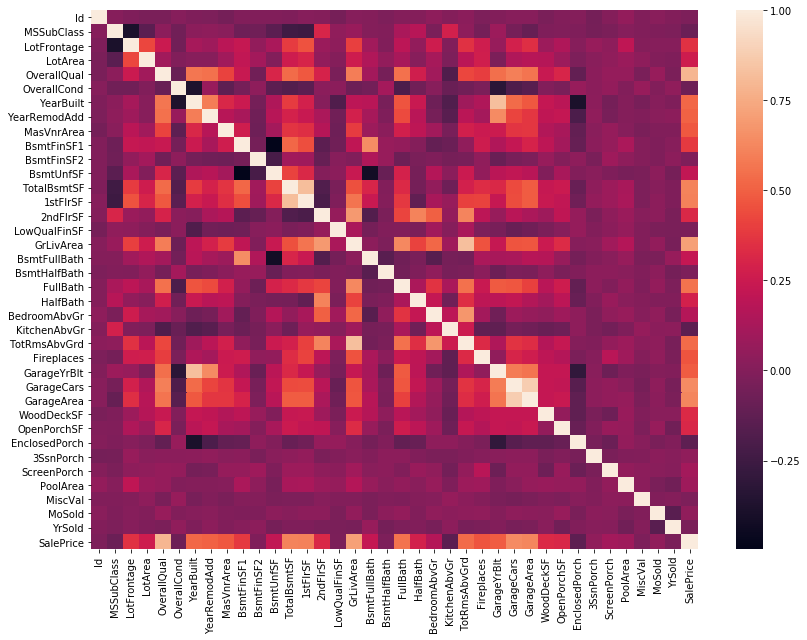

In [4]:
corrmat = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat);
tl()

# Removing unnecessary features

In [5]:
not_required = ["Id", "Street", "Alley", "Neighborhood", "Condition2",
                "Heating", "GarageYrBlt", "PavedDrive", "PoolArea", "PoolQC", 
                "Fence", "MiscFeature", "MiscVal", "MoSold", "FireplaceQu", "3SsnPorch"]
required = set(df.columns.tolist()) - set(not_required)
required = list(required)
original_columns_list = required
df = df[required]
df.head()

,SalePrice,HouseStyle,LandSlope,Foundation,TotRmsAbvGrd,MasVnrType,LandContour,BsmtFinType1,OverallQual,Fireplaces,...,BsmtQual,SaleType,LotConfig,EnclosedPorch,GarageType,ScreenPorch,YearRemodAdd,ExterQual,GarageCars,TotalBsmtSF
0,208500,2Story,Gtl,PConc,8,BrkFace,Lvl,GLQ,7,0,...,Gd,WD,Inside,0,Attchd,0,2003,Gd,2,856
1,181500,1Story,Gtl,CBlock,6,None,Lvl,ALQ,6,1,...,Gd,WD,FR2,0,Attchd,0,1976,TA,2,1262
2,223500,2Story,Gtl,PConc,6,BrkFace,Lvl,GLQ,7,1,...,Gd,WD,Inside,0,Attchd,0,2002,Gd,2,920
3,140000,2Story,Gtl,BrkTil,7,None,Lvl,ALQ,7,1,...,TA,WD,Corner,272,Detchd,0,1970,TA,3,756
4,250000,2Story,Gtl,PConc,9,BrkFace,Lvl,GLQ,8,1,...,Gd,WD,FR2,0,Attchd,0,2000,Gd,3,1145


# Outlier Removal

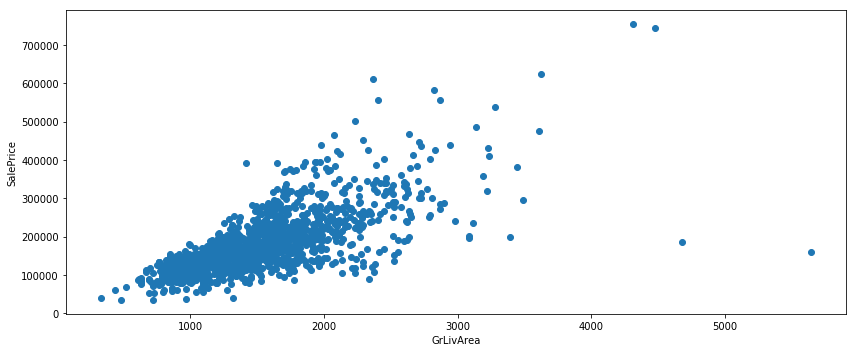

In [6]:
plt.scatter(df["GrLivArea"], df["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
tl()

In [7]:
df = df.drop(df[(df["GrLivArea"] > 4000) & (df["SalePrice"] < 300000)].index)

# Feature Engineering

In [8]:
from sklearn.preprocessing import LabelBinarizer

# label encode "CentralAir"

lb = LabelBinarizer()
df["CentralAir"] = lb.fit_transform(df["CentralAir"])
df.head()

,SalePrice,HouseStyle,LandSlope,Foundation,TotRmsAbvGrd,MasVnrType,LandContour,BsmtFinType1,OverallQual,Fireplaces,...,BsmtQual,SaleType,LotConfig,EnclosedPorch,GarageType,ScreenPorch,YearRemodAdd,ExterQual,GarageCars,TotalBsmtSF
0,208500,2Story,Gtl,PConc,8,BrkFace,Lvl,GLQ,7,0,...,Gd,WD,Inside,0,Attchd,0,2003,Gd,2,856
1,181500,1Story,Gtl,CBlock,6,None,Lvl,ALQ,6,1,...,Gd,WD,FR2,0,Attchd,0,1976,TA,2,1262
2,223500,2Story,Gtl,PConc,6,BrkFace,Lvl,GLQ,7,1,...,Gd,WD,Inside,0,Attchd,0,2002,Gd,2,920
3,140000,2Story,Gtl,BrkTil,7,None,Lvl,ALQ,7,1,...,TA,WD,Corner,272,Detchd,0,1970,TA,3,756
4,250000,2Story,Gtl,PConc,9,BrkFace,Lvl,GLQ,8,1,...,Gd,WD,FR2,0,Attchd,0,2000,Gd,3,1145


In [9]:
# Make YearBuilt to How Old the property is
df["YearBuilt"] = df["YearBuilt"].apply(lambda x: 2018 - x)
df["YearRemodAdd"] = df["YearRemodAdd"].apply(lambda x: 2018 - x)
df["YrSold"] = df["YrSold"].apply(lambda x: 2018 - x)

In [10]:
# check which cols have null values
null_having_cols = df.isnull().any()
null_having_cols = null_having_cols[null_having_cols == True]
null_having_cols = null_having_cols.index.tolist()
print("Columns with null values: {}".format(null_having_cols))

Columns with null values: ['MasVnrType', 'BsmtFinType1', 'BsmtCond', 'MasVnrArea', 'GarageFinish', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'LotFrontage', 'Electrical', 'GarageQual', 'BsmtQual', 'GarageType']


In [11]:
# print percentage null values
for col_name in null_having_cols:
    print("{0} : {1:.2f}".format(col_name, df[col_name].isnull().sum() / len(df)))

MasVnrType : 0.01
BsmtFinType1 : 0.03
BsmtCond : 0.03
MasVnrArea : 0.01
GarageFinish : 0.06
GarageCond : 0.06
BsmtExposure : 0.03
BsmtFinType2 : 0.03
LotFrontage : 0.18
Electrical : 0.00
GarageQual : 0.06
BsmtQual : 0.03
GarageType : 0.06


In [12]:
# replace "NA" with "NO" to avoid confusion with nan
df["GarageType"] = df["GarageType"].fillna("NO")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("NO")
df["MasVnrType"]= df["MasVnrType"].fillna("NO")
df["BsmtExposure"]= df["BsmtExposure"].fillna("NOB") # no is already present
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("NO")
df["GarageType"] = df["GarageType"].fillna("NO")
df["GarageFinish"] = df["GarageFinish"].fillna("NO")
df["GarageCond"] = df["GarageCond"].fillna("NO")
df["GarageQual"] = df["GarageQual"].fillna("NO")
df["BsmtQual"] = df["BsmtQual"].fillna("NO")
df["Electrical"] = df["Electrical"].fillna("SBrkr") # there is only 1 nan in "Electrical" 
df["BsmtCond"] = df["BsmtCond"].fillna("NO");

In [13]:
def exter_cond_map(cond):
    return {
        "NO": 0,
        "NA": 1,
        "Po": 2,
        "Fa": 3,
        "TA": 4,
        "Gd": 5,
        "Ex": 6
    }[cond]

exter_qual_map = exter_cond_map
heating_qc_map = exter_cond_map
kitchen_qual_map = exter_cond_map
basement_cond_map = exter_cond_map
basement_quality_map = exter_cond_map
garage_qual_map = exter_cond_map
garage_cond_map = exter_cond_map

def lot_shape_map(cond):
    return {
        "IR3": 1,
        "IR2": 2,
        "IR1": 3,
        "Reg": 4
    }[cond]

def utilities_map(cond):
    return {
        "ELO": 1,
        "NoSeWa": 2,
        "NoSewr": 3,
        "AllPub": 4
    }[cond]

def land_slope_map(cond):
    return {
        "Gtl": 1,
        "Mod": 2,
        "Sev": 3
    }[cond]

def basement_exposure_map(cond):
    return {
        "NOB": 0,
        "NA": 1,
        "No": 2,
        "Mn": 3,
        "Av": 4,
        "Gd": 5,
    }[cond]

def basement_fin_type_1_map(cond):
    return {
        "NO": 0,
        "NA": 1,
        "Unf": 2,
        "LwQ": 3,
        "Rec": 4,
        "BLQ": 5,
        "ALQ": 6,
        "GLQ": 7
    }[cond]

basement_fin_type_2_map = basement_fin_type_1_map

def functional_map(cond):
    return {
        "Sal": 0,
        "Sev": 1,
        "Maj2": 2,
        "Maj1": 3,
        "Mod": 4,
        "Min2": 5,
        "Min1": 6,
        "Typ": 7
    }[cond]


In [14]:
def ap(feature, map_name):
    df[feature] = df[feature].apply(map_name)

ap("ExterCond", exter_cond_map)
ap("ExterQual", exter_qual_map)
ap("HeatingQC", heating_qc_map)
ap("KitchenQual", kitchen_qual_map)
ap("BsmtQual", basement_quality_map)
ap("BsmtCond", basement_cond_map)
ap("GarageQual", garage_qual_map)
ap("GarageCond", garage_cond_map)
ap("LotShape", lot_shape_map)
ap("Utilities", utilities_map)
ap("LandSlope", land_slope_map)
ap("BsmtExposure", basement_exposure_map)
ap("BsmtFinType1", basement_fin_type_1_map)
ap("BsmtFinType2", basement_fin_type_2_map)
ap("Functional", functional_map)

In [15]:
# check which cols have null values
null_having_cols = df.isnull().any()
null_having_cols = null_having_cols[null_having_cols == True]
null_having_cols = null_having_cols.index.tolist()
print("Columns with null values: {}".format(null_having_cols))

Columns with null values: ['MasVnrArea', 'LotFrontage']


In [16]:
from sklearn.preprocessing import Imputer

# imputer for missing real values
imp = Imputer(strategy="median")
df[null_having_cols] = imp.fit_transform(df[null_having_cols])

# Transformation

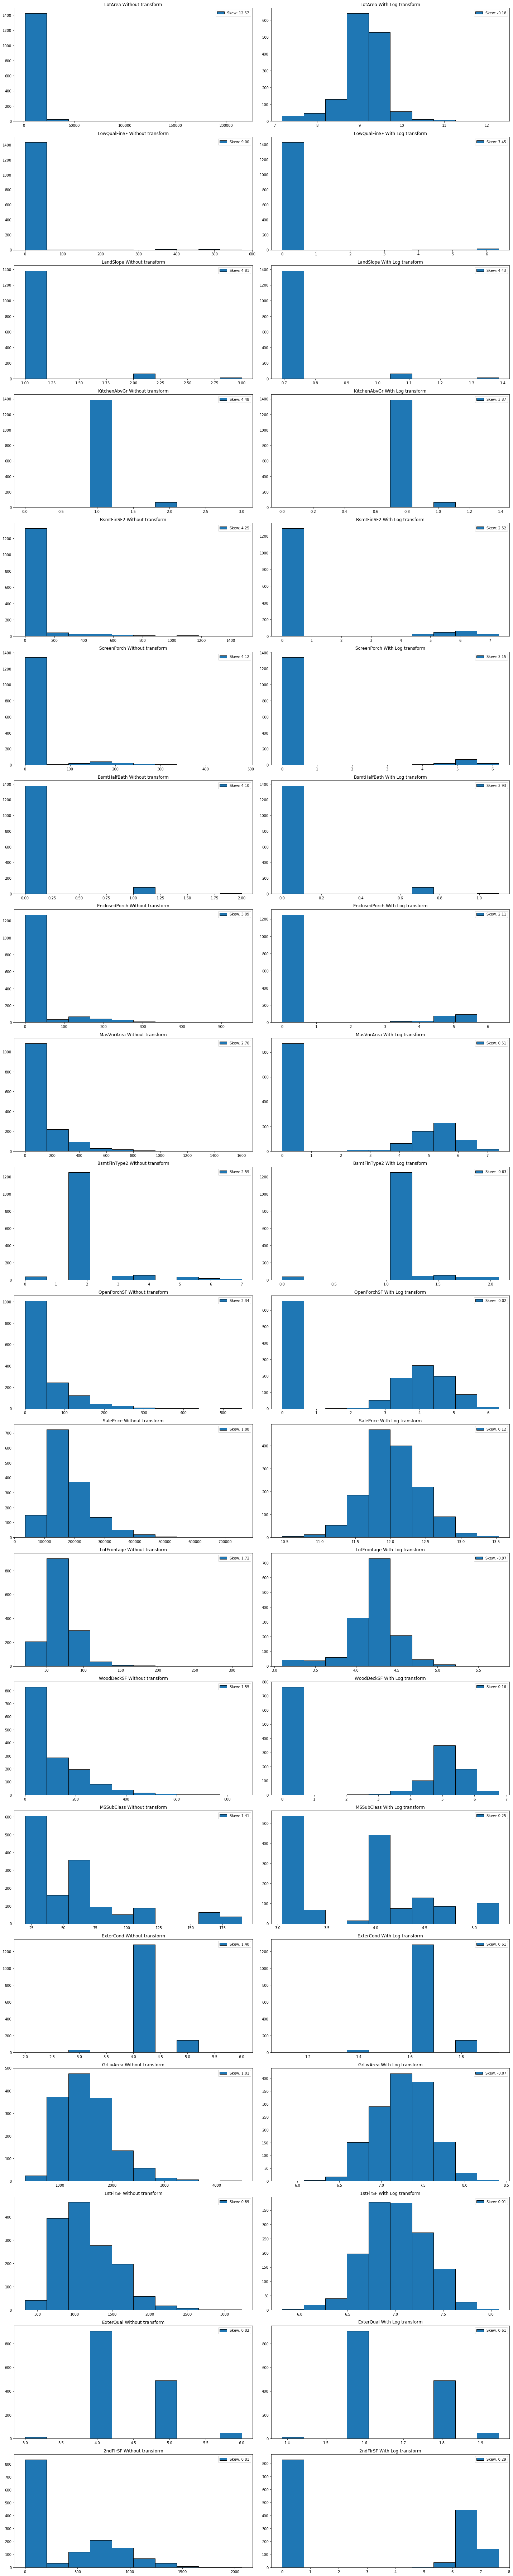

In [17]:
skew_limit = 0.8
df_skew = df.skew().sort_values()[::-1]
df_skew = df_skew[df_skew > skew_limit]

# log transformation doesn't reduce
# skewness of BsmtUnfSF

del df_skew["BsmtUnfSF"]

idx = 1
plt.figure(figsize=(20, 100))
for feature in df_skew.index:
    for switch in [0, 1]:
        plt.subplot(len(df_skew), 2, idx)
        if not switch:
            plt.hist(df[feature], label="Skew: {0:.2f}".format(df[feature].skew()), edgecolor="black")
            plt.title("{} Without transform".format(feature))
            plt.legend()
        else:
            plt.hist(np.log1p(df[feature]), label="Skew: {0:.2f}".format(np.log1p(df[feature]).skew()), edgecolor="black")
            plt.title("{} With Log transform".format(feature))
            plt.legend()
        idx += 1
tl()

In [18]:
for feature in df_skew.index:
    df[feature] = df[feature].apply(np.log1p)

In [19]:
def kill_multicollinearity(original_df):
    print("Original DF columns: {}".format(len(original_df.columns)))    
    categorical_columns = [x for x in original_df.columns.tolist() if original_df[x].dtype == np.dtype("O")]
    ip_df = pd.get_dummies(original_df.copy())
    print("Columns after one hot encode: {}".format(len(ip_df.columns)))
    print("Categorical columns: {}".format(categorical_columns))
    for categorical_column in categorical_columns:
        unique_values = original_df[categorical_column].unique()
        ip_df = ip_df.drop(categorical_column + "_" + unique_values[-1], axis=1)
        print("Dropping: {}".format(unique_values[-1]))
    print("Columns after: {}".format(len(ip_df.columns)))
    return ip_df

In [20]:
df_one_hot = kill_multicollinearity(df)

Original DF columns: 65
Columns after one hot encode: 170
Categorical columns: ['HouseStyle', 'Foundation', 'MasVnrType', 'LandContour', 'Exterior1st', 'Exterior2nd', 'Condition1', 'GarageFinish', 'RoofStyle', 'MSZoning', 'SaleCondition', 'Electrical', 'RoofMatl', 'BldgType', 'SaleType', 'LotConfig', 'GarageType']
Dropping: 2.5Fin
Dropping: Stone
Dropping: NO
Dropping: HLS
Dropping: CBlock
Dropping: CBlock
Dropping: RRNe
Dropping: NO
Dropping: Shed
Dropping: RH
Dropping: Family
Dropping: Mix
Dropping: Roll
Dropping: Twnhs
Dropping: Oth
Dropping: FR3
Dropping: 2Types
Columns after: 153


In [21]:
from sklearn.preprocessing import StandardScaler

X_vars = df_one_hot.columns.tolist()
X_vars.remove("SalePrice")
X = df_one_hot[X_vars]
y = df_one_hot["SalePrice"]
X_sca = StandardScaler()
X = X_sca.fit_transform(X)
y_sca = StandardScaler()
y = y_sca.fit_transform(y.values.reshape(-1, 1))

In [22]:
from sklearn.metrics import make_scorer, mean_squared_log_error


def exp_log_err(y_true, y_pred):
    try:
        return mean_squared_log_error(np.exp(y_sca.inverse_transform(y_true)), 
                                      np.exp(y_sca.inverse_transform(y_pred)))
    except Exception as e:
        print("Exception", e)
        return np.inf


error_function = make_scorer(score_func=exp_log_err, greater_is_better=False)

In [22]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_log_error
# from sklearn.linear_model import PassiveAggressiveRegressor
# from sklearn.svm import SVR

# clf_cv = XGBRegressor()

# xgb_parameters = {
#     "learning_rate": np.linspace(0.01, 1),
#     "n_estimators": [1000, 2000, 3000, 4000],
#     "booster": ["gbtree", "gblinear", "dart"],
#     "min_child_weight": np.arange(1, 10),
#     "reg_alpha": np.linspace(0.01, 0.5),
#     "reg_lambda": np.linspace(0.01, 0.5),
#     "gamma": [0, 0.001, 0.01, 0.05],
    
# }

# gb_parameters = {
#     "loss": ["ls", "lad", "huber", "quantile"],
#     "learning_rate": np.linspace(0.01, 0.5),
#     "n_estimators": np.floor(np.linspace(50, 5000)).astype(int),
# }

# lgbm_parameters = {
#     "boosting_type": ["gbdt", "dart", "goss", "rf"],
# #     "reg_alpha": np.linspace(0.1, 10),
#     "reg_lambda": np.linspace(0.1, 10)
# }

# ridge_parameters = {
#     "alpha": np.linspace(0.001, 150),
#     "tol": np.linspace(0.001, 150),
#     "max_iter": [5000]
# }

# par_parameters = {
#     "C": np.linspace(0.9, 1),
#     "max_iter": [1000, 1500, 2000],
#     "average": [0, 1]
# }

# svr_params = {
#     "kernel": ["linear", "poly", "rbf", "sigmoid"],
#     "degree": [1, 2, 3, 4, 5, 6, 7, 8],
#     "C": np.linspace(0.5, 1),
#     "epsilon": np.linspace(0.01, 0.2)
# }

# random_search = RandomizedSearchCV(estimator=clf_cv, param_distributions=xgb_parameters,
#                                   scoring=error_function, n_iter=20, cv=7)
# random_search.fit(X, y.ravel())
# print("Best est: {}".format(random_search.best_estimator_))
# print("Best loss: {}".format(random_search.best_score_))

```
Best est: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06999999999999999,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=334, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
       
Best loss: -0.0151683462003115

Best est: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3282,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Best loss: -0.015400226872212349

Best est: Ridge(alpha=107.14314285714286, copy_X=True, fit_intercept=True,
   max_iter=5000, normalize=False, random_state=None, solver='auto',
   tol=107.14314285714286)
Best loss: -0.013381002662878798

Best est: PassiveAggressiveRegressor(C=0.9408163265306123, average=1, epsilon=0.1,
              fit_intercept=True, loss='epsilon_insensitive',
              max_iter=1000, n_iter=None, random_state=None, shuffle=True,
              tol=None, verbose=0, warm_start=False)
Best loss: -0.0226563802133436

Best est: SVR(C=0.6326530612244898, cache_size=200, coef0=0.0, degree=1,
  epsilon=0.1573469387755102, gamma='auto', kernel='poly', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False)
Best loss: -0.02108130958313247
```

In [33]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, PassiveAggressiveRegressor, Lasso, ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor

avg_log_error = 0

clf1 = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

clf2 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

clf3 = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)



clf4 = Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
                   normalize=False, random_state=None, solver='auto',
                   tol=0.53522448979591837)

clf5 = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# clf6 = SVR(C=0.6326530612244898, cache_size=200, coef0=0.0, degree=1,
#   epsilon=0.1573469387755102, gamma='auto', kernel='poly', max_iter=-1,
#   shrinking=True, tol=0.001, verbose=False)

# clf7 = XGBRegressor(n_estimators=1000)

# clf8 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0, learning_rate=0.06999999999999999,
#        max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
#        n_estimators=334, n_jobs=1, nthread=None, objective='reg:linear',
#        random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#        seed=None, silent=True, subsample=1)


clfs = [clf1, clf2, clf3, clf4, clf5]
# weightages = [5, 1, 1, 0.5, 1.5, 0.5, 0.5, 0.5]
# weightages = [1, 1, 1, 1, 1]
weightages = [1] * len(clfs)

for train_index, test_index in KFold(n_splits=14, shuffle=True).split(X):
    y_pred_sum = np.zeros(test_index.shape)
    for indx, classifier in enumerate(clfs):
        classifier.fit(X[train_index], y[train_index].ravel())
        y_pred_sum += classifier.predict(X[test_index]) * weightages[indx]
    y_pred = y_pred_sum / sum(weightages)
#     clf =  AdaBoostRegressor(n_estimators=400)
#     clf.fit(X[train_index], y[train_index].ravel())
#     y_pred = clf.predict(X[test_index])
    err = exp_log_err(y[test_index], y_pred)
    avg_log_error += err
print("Avg log error: {}".format(avg_log_error/14))

Avg log error: 0.011987087893788263


In [24]:
# GBoosting                    0.017431612914241813
# GB + XGB                     0.017220569923471943
# GB(Lr = 0.11, est=500) + XGB 0.01617745381607883
# above + lightbgm             0.016096660624601963
# above + logtransform         0.01528462395915424
# weightages = [5, 1, 1, 1, 0.5, 0.5, 0.5, 0.5] .01526662

In [25]:
for classifier in clfs:
        classifier.fit(X, y.ravel())

# Deep Learning

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Conv1D
from keras.losses import mean_squared_logarithmic_error, mean_squared_error

model = Sequential()

model.add(Dense(128, input_shape=(X.shape[1], )))
model.add(Dropout(0.2))
model.add(Activation("relu"))

model.add(BatchNormalization())

model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Activation("relu"))

model.add(BatchNormalization())

model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Activation("relu"))

model.add(BatchNormalization())

model.add(Dense(16))
model.add(Dropout(0.2))
model.add(Activation("relu"))

model.add(BatchNormalization())

model.add(Dense(1))

model.compile(optimizer="adam", loss=mean_squared_logarithmic_error, 
              metrics=[mean_squared_logarithmic_error, mean_squared_error])

C:\Users\makul\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [35]:
model.fit(X, y.ravel(), epochs=100, batch_size=32)

Epoch 1/100
1458/1458 [==============================] - 2s 1ms/step - loss: 0.1689 - mean_squared_logarithmic_error: 0.1689 - mean_squared_error: 1.6117
Epoch 2/100
1458/1458 [==============================] - 0s 93us/step - loss: 0.1136 - mean_squared_logarithmic_error: 0.1136 - mean_squared_error: 1.1690
Epoch 3/100
1458/1458 [==============================] - 0s 93us/step - loss: 0.0936 - mean_squared_logarithmic_error: 0.0936 - mean_squared_error: 1.0848
Epoch 4/100
1458/1458 [==============================] - 0s 102us/step - loss: 0.0816 - mean_squared_logarithmic_error: 0.0816 - mean_squared_error: 1.0275
Epoch 5/100
1458/1458 [==============================] - 0s 93us/step - loss: 0.0757 - mean_squared_logarithmic_error: 0.0757 - mean_squared_error: 0.9668
Epoch 6/100
1458/1458 [==============================] - 0s 93us/step - loss: 0.0627 - mean_squared_logarithmic_error: 0.0627 - mean_squared_error: 0.9640
Epoch 7/100
1458/1458 [==============================] - 0s 107us/step

1458/1458 [==============================] - 0s 96us/step - loss: 0.0212 - mean_squared_logarithmic_error: 0.0212 - mean_squared_error: 0.5121
Epoch 54/100
1458/1458 [==============================] - 0s 96us/step - loss: 0.0184 - mean_squared_logarithmic_error: 0.0184 - mean_squared_error: 0.4698
Epoch 55/100
1458/1458 [==============================] - 0s 110us/step - loss: 0.0176 - mean_squared_logarithmic_error: 0.0176 - mean_squared_error: 0.4920
Epoch 56/100
1458/1458 [==============================] - 0s 96us/step - loss: 0.0173 - mean_squared_logarithmic_error: 0.0173 - mean_squared_error: 0.4847
Epoch 57/100
1458/1458 [==============================] - 0s 93us/step - loss: 0.0182 - mean_squared_logarithmic_error: 0.0182 - mean_squared_error: 0.4738
Epoch 58/100
1458/1458 [==============================] - 0s 96us/step - loss: 0.0163 - mean_squared_logarithmic_error: 0.0163 - mean_squared_error: 0.4881
Epoch 59/100
1458/1458 [==============================] - 0s 107us/step - lo

# Testing

In [28]:
test_df = pd.read_csv("test.csv")
original_columns_list.remove("SalePrice")
test_df = test_df[original_columns_list]
test_df.head()

,MSSubClass,ExterCond,BsmtFinType2,YearRemodAdd,SaleType,BsmtHalfBath,Condition1,Fireplaces,BldgType,RoofMatl,...,Electrical,Functional,BsmtFinType1,GarageQual,GrLivArea,ExterQual,OverallQual,FullBath,WoodDeckSF,BsmtQual
0,20,TA,LwQ,1961,WD,0.0,Feedr,0,1Fam,CompShg,...,SBrkr,Typ,Rec,TA,896,TA,5,1,140,TA
1,20,TA,Unf,1958,WD,0.0,Norm,0,1Fam,CompShg,...,SBrkr,Typ,ALQ,TA,1329,TA,6,1,393,TA
2,60,TA,Unf,1998,WD,0.0,Norm,1,1Fam,CompShg,...,SBrkr,Typ,GLQ,TA,1629,TA,5,2,212,Gd
3,60,TA,Unf,1998,WD,0.0,Norm,1,1Fam,CompShg,...,SBrkr,Typ,GLQ,TA,1604,TA,6,2,360,TA
4,120,TA,Unf,1992,WD,0.0,Norm,0,TwnhsE,CompShg,...,SBrkr,Typ,ALQ,TA,1280,Gd,8,2,0,Gd


In [29]:
# Make YearBuilt to How Old the property is
test_df["YearBuilt"] = test_df["YearBuilt"].apply(lambda x: 2018 - x)
test_df["YearRemodAdd"] = test_df["YearRemodAdd"].apply(lambda x: 2018 - x)
test_df["YrSold"] = test_df["YrSold"].apply(lambda x: 2018 - x)

# label binarize CentralAir
test_df["CentralAir"] = lb.transform(test_df["CentralAir"])

In [30]:
# check which cols have null values
null_having_cols_test = test_df.isnull().any()
null_having_cols_test = null_having_cols_test[null_having_cols_test == True]
null_having_cols_test = null_having_cols_test.index.tolist()
print("Columns with null values: {}".format(null_having_cols_test))

Columns with null values: ['BsmtFinType2', 'SaleType', 'BsmtHalfBath', 'BsmtFullBath', 'KitchenQual', 'GarageCars', 'BsmtFinSF2', 'MSZoning', 'BsmtCond', 'BsmtFinSF1', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageFinish', 'BsmtExposure', 'MasVnrArea', 'GarageArea', 'Exterior1st', 'GarageType', 'LotFrontage', 'Exterior2nd', 'MasVnrType', 'Functional', 'BsmtFinType1', 'GarageQual', 'BsmtQual']


In [31]:
test_df["ExterCond"] = test_df["ExterCond"].apply(exter_cond_map)

In [32]:
# Create custom imputer
from sklearn.base import TransformerMixin

class StringImputer(TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.fill = pd.Series([original[c].value_counts().index[0]
            if original[c].dtype == np.dtype("O") else original[c].mean()
                             for c in X], index=X.columns)
        return self
    
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [33]:
simp = StringImputer()
test_df = simp.fit_transform(test_df)

In [34]:
# print percentage null values
for col_name in null_having_cols:
    print("Name: {0}   \tCount: {1}\tPer: {2:.2f}  Type: {3}".format(col_name, 
            test_df[col_name].isnull().sum(), test_df[col_name].isnull().sum() / len(df),
            test_df[col_name].dtype))

Name: MasVnrArea   	Count: 0	Per: 0.00  Type: float64
Name: LotFrontage   	Count: 0	Per: 0.00  Type: float64


In [35]:
# log transform
del df_skew["SalePrice"]
for feature in df_skew.index:
    print("Applying to: {}".format(feature))
    test_df[feature] = test_df[feature].apply(np.log1p)

Applying to: LotArea
Applying to: LowQualFinSF
Applying to: KitchenAbvGr
Applying to: BsmtFinSF2
Applying to: ScreenPorch
Applying to: BsmtHalfBath
Applying to: EnclosedPorch
Applying to: MasVnrArea
Applying to: OpenPorchSF
Applying to: LotFrontage
Applying to: WoodDeckSF
Applying to: MSSubClass
Applying to: ExterCond
Applying to: GrLivArea
Applying to: 1stFlrSF
Applying to: 2ndFlrSF
Applying to: BsmtFinSF1


In [36]:
test_df_one_hot = pd.get_dummies(test_df)

In [37]:
unset_cols = set(X_vars) - set(test_df_one_hot.columns)
for unset in unset_cols:
    print("Setting : {}".format(unset))
    test_df_one_hot[unset] = 0

Setting : BsmtExposure_NOB
Setting : RoofMatl_Membran
Setting : GarageType_NO
Setting : Electrical_Mix
Setting : BsmtFinType2_NO
Setting : GarageQual_NO
Setting : BsmtCond_NO
Setting : HouseStyle_2.5Fin
Setting : Exterior1st_ImStucc
Setting : RoofMatl_Metal
Setting : MasVnrType_NO
Setting : GarageQual_Ex
Setting : Exterior1st_Stone
Setting : RoofMatl_Roll
Setting : BsmtFinType1_NO
Setting : Exterior2nd_Other
Setting : BsmtQual_NO
Setting : GarageFinish_NO


In [38]:
test_final_df = pd.DataFrame()

for index, col_name in enumerate(df_one_hot.columns):
    if col_name == "SalePrice":
        continue
    test_final_df[col_name] = test_df_one_hot[col_name]

In [39]:
# results = model.predict(X_sca.transform(test_final_df))

In [40]:
results = np.zeros(test_final_df.shape[0])
for idx, classifiers in enumerate(clfs):
    results += (classifiers.predict(X_sca.transform(test_final_df)) * weightages[idx])

In [41]:
# add keras mode
# results += model.predict(X_sca.transform(test_final_df)).flatten()

In [42]:
results /= sum(weightages)

In [43]:
# x = np.expm1(results)
x = np.expm1(y_sca.inverse_transform(results))

In [44]:
test_df = pd.read_csv("test.csv")

In [45]:
with open("results.csv", "w") as out:
    out.write("Id,SalePrice\n")
    for indx, row in test_df.iterrows():
        out.write("{}, {}\n".format(row["Id"], x[indx]))

In [46]:
np.expm1?